In [55]:
%matplotlib inline

In [56]:
import numpy as np
from scipy.spatial import distance_matrix
import matplotlib.pyplot as plt

The k-means algorithm.

In [57]:
def k_means(X, K):
    nrow = X.shape[0]
    ncol = X.shape[1]

    # pick K random data points as initial centroids
    initial_centroids = np.random.choice(nrow, K, replace=False)
    centroids = X[initial_centroids]

    centroids_old = np.zeros((K, ncol))
    cluster_assignments = np.zeros(nrow)

    while (centroids_old != centroids).any():
        centroids_old = centroids.copy()

        # compute distances between data points and centroids
        dist_matrix = distance_matrix(X, centroids, p=2)

        for i in np.arange(nrow):
            # find closest centroid
            d = dist_matrix[i]
            closest_centroid = (np.where(d == np.min(d)))[0][0]

            # associate data point with closest centroid
            cluster_assignments[i] = closest_centroid

        # recompute centroids
        for k in np.arange(K):
            Xk = X[cluster_assignments == k]
            centroids[k] = np.apply_along_axis(np.mean, axis=0, arr=Xk)

    return (centroids, cluster_assignments)

Generate data.

In [58]:
x_cluster_1 = np.arange(2, 6, 0.01)
y_cluster_1 = 1 + (np.random.normal(0, 1, len(x_cluster_1))) * 2

x_cluster_2 = np.arange(14, 18, 0.01)
y_cluster_2 = 1 + (np.random.normal(0, 1, len(x_cluster_2))) * 2

x_cluster_3 = np.arange(7, 12, 0.01)
y_cluster_3 = 14 + (np.random.normal(0, 1, len(x_cluster_3))) * 2

x = np.concatenate([x_cluster_1, x_cluster_2, x_cluster_3])
y = np.concatenate([y_cluster_1, y_cluster_2, y_cluster_3])

data = np.column_stack((x,y))

Apply k-means to data.

In [59]:
K = 3
k_means_result = k_means(data, K)
centroids = k_means_result[0]
cluster_assignments = (k_means_result[1]).tolist()

Plot clustering result.

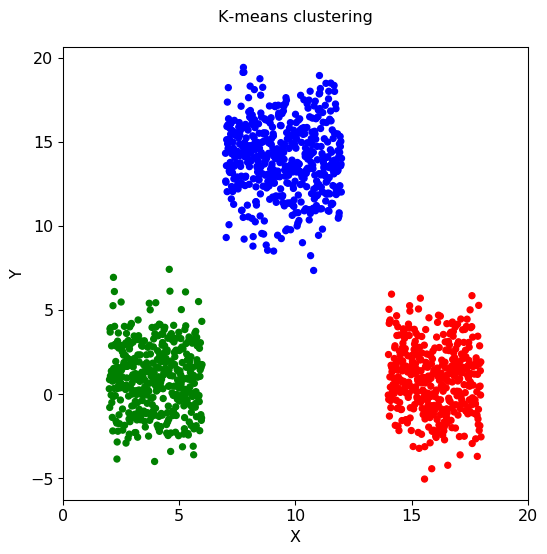

In [60]:
colors = ['r', 'g', 'b']
f = lambda x: colors[int(x)]
cluster_assignments = list(map(f, cluster_assignments))

my_dpi = 96
plt.figure(figsize=(600/my_dpi, 600/my_dpi), dpi=my_dpi)

plt.xlabel('X', fontsize=12)
plt.ylabel('Y', fontsize=12)
plt.title('K-means clustering\n', fontsize=12)

plt.scatter(data[:,0], data[:,1], color=cluster_assignments, s=20)

plt.xticks(np.arange(0, 21, 5), fontsize=12)
plt.yticks(np.arange(-5, 21, 5), fontsize=12)

plt.show()